# Solar Data EDA - Sierra Leone (Bumbuna)

## 🌞 Project Overview
This notebook performs Exploratory Data Analysis (EDA) on solar irradiance data from Sierra Leone (Bumbuna location).

### 📋 Analysis Goals:
1. **Data Overview** - Basic statistics and structure
2. **Data Quality** - Missing values, outliers, data types
3. **Solar Irradiance Analysis** - GHI, DNI, DHI patterns
4. **Weather Analysis** - Temperature, humidity, wind patterns
5. **Time Series Analysis** - Seasonal and daily patterns
6. **Data Cleaning** - Handle missing values and outliers
7. **Export Clean Data** - Save processed dataset

### 🔑 Key Variables:
- **GHI**: Global Horizontal Irradiance (W/m²)
- **DNI**: Direct Normal Irradiance (W/m²)
- **DHI**: Diffuse Horizontal Irradiance (W/m²)
- **Tamb**: Ambient Temperature (°C)
- **RH**: Relative Humidity (%)
- **WS**: Wind Speed (m/s)

### 🔄 Comparison Note:
This analysis will be compared with Benin and Togo data for cross-country solar investment evaluation.

## 📚 1. Import Libraries and Setup

In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Statistical analysis
from scipy import stats
from scipy.stats import zscore

# Warnings and display settings
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Set plot style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("✅ Libraries imported successfully!")
print(f"📊 Pandas version: {pd.__version__}")
print(f"🔢 NumPy version: {np.__version__}")
print("🇸🇱 Ready to analyze Sierra Leone solar data!")

✅ Libraries imported successfully!
📊 Pandas version: 2.3.3
🔢 NumPy version: 2.2.6
🇸🇱 Ready to analyze Sierra Leone solar data!


## 📂 2. Load and Initial Data Exploration

In [2]:
# Load the Sierra Leone dataset
file_path = '../data/sierraleone-bumbuna.csv'

print("📥 Loading Sierra Leone (Bumbuna) solar data...")
df_sierraleone = pd.read_csv(file_path)

print(f"✅ Data loaded successfully!")
print(f"📊 Dataset shape: {df_sierraleone.shape[0]:,} rows × {df_sierraleone.shape[1]} columns")
print(f"💾 Memory usage: {df_sierraleone.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

📥 Loading Sierra Leone (Bumbuna) solar data...
✅ Data loaded successfully!
📊 Dataset shape: 525,600 rows × 19 columns
💾 Memory usage: 108.77 MB
✅ Data loaded successfully!
📊 Dataset shape: 525,600 rows × 19 columns
💾 Memory usage: 108.77 MB


In [3]:
# Display basic information about the dataset
print("🔍 DATASET OVERVIEW - SIERRA LEONE")
print("=" * 50)
print("\n📋 Column Names and Data Types:")
print(df_sierraleone.dtypes)

print("\n👀 First Few Rows:")
df_sierraleone.head()

🔍 DATASET OVERVIEW - SIERRA LEONE

📋 Column Names and Data Types:
Timestamp         object
GHI              float64
DNI              float64
DHI              float64
ModA             float64
ModB             float64
Tamb             float64
RH               float64
WS               float64
WSgust           float64
WSstdev          float64
WD               float64
WDstdev          float64
BP                 int64
Cleaning           int64
Precipitation    float64
TModA            float64
TModB            float64
Comments         float64
dtype: object

👀 First Few Rows:


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,WSstdev,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments
0,2021-10-30 00:01,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.1,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
1,2021-10-30 00:02,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
2,2021-10-30 00:03,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.2,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN
3,2021-10-30 00:04,-0.7,0.0,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.1,22.3,22.6,NaN
4,2021-10-30 00:05,-0.7,-0.1,-0.8,0.0,0.0,21.9,99.3,0.0,0.0,0.0,0.0,0.0,1002,0,0.0,22.3,22.6,NaN


In [4]:
# Convert Timestamp to datetime and set as index
print("🕐 Converting Timestamp to datetime...")
df_sierraleone['Timestamp'] = pd.to_datetime(df_sierraleone['Timestamp'])
df_sierraleone.set_index('Timestamp', inplace=True)

print("✅ Timestamp conversion complete!")
print(f"📅 Date range: {df_sierraleone.index.min()} to {df_sierraleone.index.max()}")
print(f"⏱️  Duration: {df_sierraleone.index.max() - df_sierraleone.index.min()}")

🕐 Converting Timestamp to datetime...
✅ Timestamp conversion complete!
📅 Date range: 2021-10-30 00:01:00 to 2022-10-30 00:00:00
⏱️  Duration: 364 days 23:59:00


## 📊 3. Summary Statistics

In [5]:
# Generate comprehensive summary statistics
print("📈 SUMMARY STATISTICS - SIERRA LEONE")
print("=" * 50)

# Key solar irradiance columns
solar_columns = ['GHI', 'DNI', 'DHI']
weather_columns = ['Tamb', 'RH', 'WS', 'WSgust', 'WD', 'BP']

print("\n☀️ Solar Irradiance Statistics:")
df_sierraleone[solar_columns].describe().round(2)

📈 SUMMARY STATISTICS - SIERRA LEONE

☀️ Solar Irradiance Statistics:


,GHI,DNI,DHI
count,525600.00,525600.00,525600.00
mean,201.96,116.38,113.72
std,298.50,218.65,158.95
min,-19.50,-7.80,-17.90
25%,-2.80,-0.30,-3.80
50%,0.30,-0.10,-0.10
75%,362.40,107.00,224.70
max,1499.00,946.00,892.00


In [6]:
print("🌤️ Weather Variables Statistics:")
df_sierraleone[weather_columns].describe().round(2)

🌤️ Weather Variables Statistics:


,Tamb,RH,WS,WSgust,WD,BP
count,525600.00,525600.00,525600.00,525600.00,525600.00,525600.00
mean,26.32,79.45,1.15,1.69,133.04,999.88
std,4.40,20.52,1.24,1.62,114.28,2.10
min,12.30,9.90,0.00,0.00,0.00,993.00
25%,23.10,68.70,0.00,0.00,0.00,999.00
50%,25.30,85.40,0.80,1.60,161.50,1000.00
75%,29.40,96.70,2.00,2.60,234.10,1001.00
max,39.90,100.00,19.20,23.90,360.00,1006.00


## ❓ 4. Missing Values Analysis

🔍 MISSING VALUES ANALYSIS - SIERRA LEONE
❌ Columns with missing values:
          Missing Count  Missing Percentage
Comments         525600               100.0


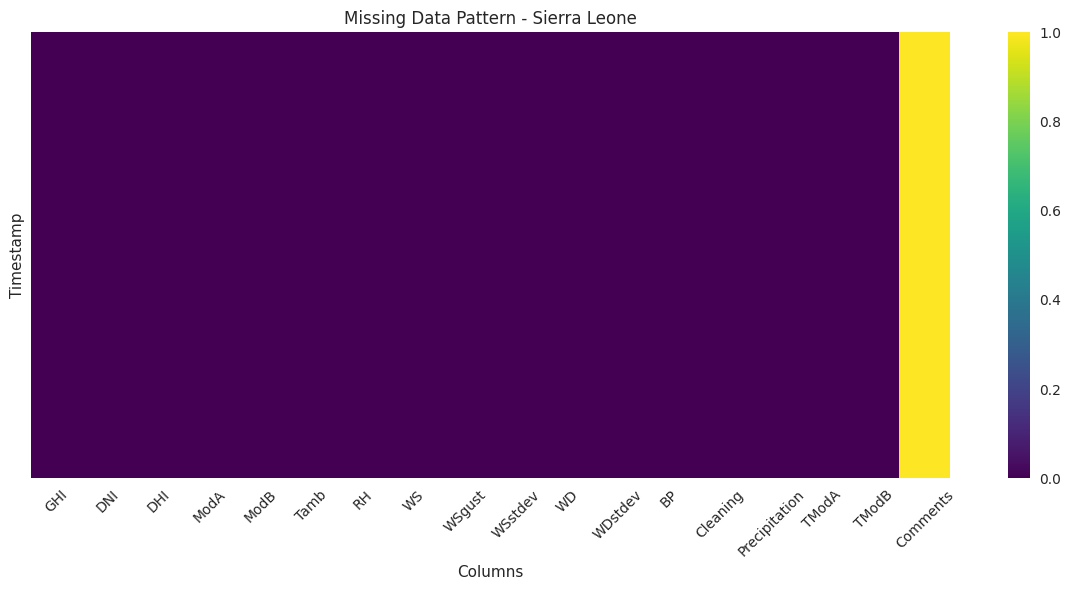

In [7]:
# Analyze missing values
print("🔍 MISSING VALUES ANALYSIS - SIERRA LEONE")
print("=" * 50)

missing_data = df_sierraleone.isnull().sum()
missing_percentage = (missing_data / len(df_sierraleone)) * 100

missing_summary = pd.DataFrame({
    'Missing Count': missing_data,
    'Missing Percentage': missing_percentage.round(2)
})

# Show only columns with missing values
missing_summary = missing_summary[missing_summary['Missing Count'] > 0]
missing_summary = missing_summary.sort_values('Missing Count', ascending=False)

if len(missing_summary) > 0:
    print("❌ Columns with missing values:")
    print(missing_summary)
else:
    print("✅ No missing values found!")

# Visualize missing data pattern
plt.figure(figsize=(12, 6))
sns.heatmap(df_sierraleone.isnull(), cbar=True, yticklabels=False, cmap='viridis')
plt.title('Missing Data Pattern - Sierra Leone')
plt.xlabel('Columns')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 🎯 5. Outlier Detection (Z-Score Method)

In [8]:
# Outlier detection using Z-score method
print("🎯 OUTLIER DETECTION (Z-Score > 3) - SIERRA LEONE")
print("=" * 50)

# Select numeric columns for outlier analysis
numeric_columns = df_sierraleone.select_dtypes(include=[np.number]).columns.tolist()

outlier_counts = {}
z_threshold = 3

for col in numeric_columns:
    if col in ['ModA', 'ModB', 'Cleaning']:  # Skip binary/categorical columns
        continue
        
    # Calculate z-scores (handle missing values)
    z_scores = np.abs(zscore(df_sierraleone[col], nan_policy='omit'))
    outliers = np.sum(z_scores > z_threshold)
    outlier_percentage = (outliers / len(df_sierraleone[col].dropna())) * 100
    
    outlier_counts[col] = {
        'Count': outliers,
        'Percentage': outlier_percentage
    }

# Convert to DataFrame and display
outlier_df = pd.DataFrame(outlier_counts).T
outlier_df['Percentage'] = outlier_df['Percentage'].round(2)
outlier_df = outlier_df.sort_values('Count', ascending=False)

print("🔍 Outlier Summary (Z-score > 3):")
print(outlier_df)

🎯 OUTLIER DETECTION (Z-Score > 3) - SIERRA LEONE
🔍 Outlier Summary (Z-score > 3):
                Count  Percentage
DNI            7586.0        1.44
WDstdev        5140.0        0.98
RH             4929.0        0.94
Precipitation  4067.0        0.77
WS             3967.0        0.75
WSgust         3665.0        0.70
DHI            2986.0        0.57
GHI            2477.0        0.47
WSstdev        2410.0        0.46
BP              977.0        0.19
Tamb            192.0        0.04
TModA           100.0        0.02
TModB             4.0        0.00
WD                0.0        0.00
Comments          0.0         NaN
🔍 Outlier Summary (Z-score > 3):
                Count  Percentage
DNI            7586.0        1.44
WDstdev        5140.0        0.98
RH             4929.0        0.94
Precipitation  4067.0        0.77
WS             3967.0        0.75
WSgust         3665.0        0.70
DHI            2986.0        0.57
GHI            2477.0        0.47
WSstdev        2410.0        0.46
B

## 📈 6. Solar Irradiance Visualization

☀️ SOLAR IRRADIANCE ANALYSIS - SIERRA LEONE


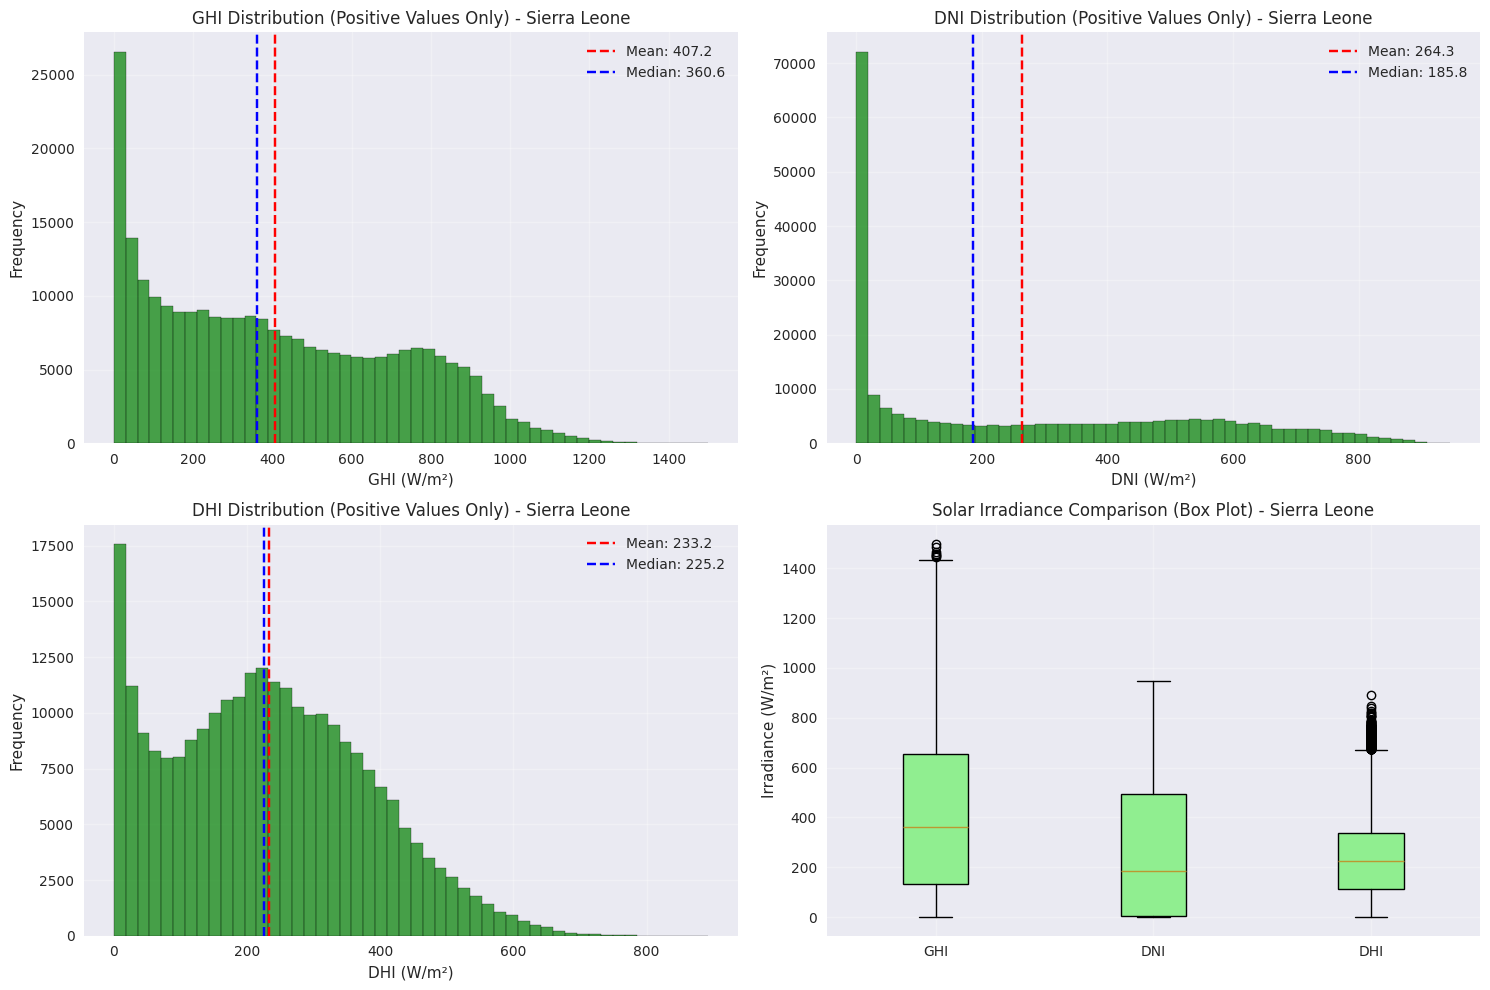

In [9]:
# Solar irradiance distribution plots
print("☀️ SOLAR IRRADIANCE ANALYSIS - SIERRA LEONE")
print("=" * 50)

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Histograms for each solar variable
for i, col in enumerate(solar_columns):
    ax = axes[i//2, i%2]
    
    # Filter positive values only (negative values are nighttime/measurement errors)
    positive_values = df_sierraleone[df_sierraleone[col] > 0][col]
    
    ax.hist(positive_values, bins=50, alpha=0.7, edgecolor='black', color='green')
    ax.set_title(f'{col} Distribution (Positive Values Only) - Sierra Leone')
    ax.set_xlabel(f'{col} (W/m²)')
    ax.set_ylabel('Frequency')
    ax.grid(True, alpha=0.3)
    
    # Add statistics
    mean_val = positive_values.mean()
    median_val = positive_values.median()
    ax.axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.1f}')
    ax.axvline(median_val, color='blue', linestyle='--', label=f'Median: {median_val:.1f}')
    ax.legend()

# Box plot for comparison
ax = axes[1, 1]
solar_data_positive = []
labels = []

for col in solar_columns:
    positive_values = df_sierraleone[df_sierraleone[col] > 0][col]
    solar_data_positive.append(positive_values)
    labels.append(col)

bp = ax.boxplot(solar_data_positive, labels=labels, patch_artist=True)
# Set green color for Sierra Leone
for patch in bp['boxes']:
    patch.set_facecolor('lightgreen')
ax.set_title('Solar Irradiance Comparison (Box Plot) - Sierra Leone')
ax.set_ylabel('Irradiance (W/m²)')
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 🌡️ 7. Weather Variables Analysis

🌤️ WEATHER VARIABLES ANALYSIS - SIERRA LEONE


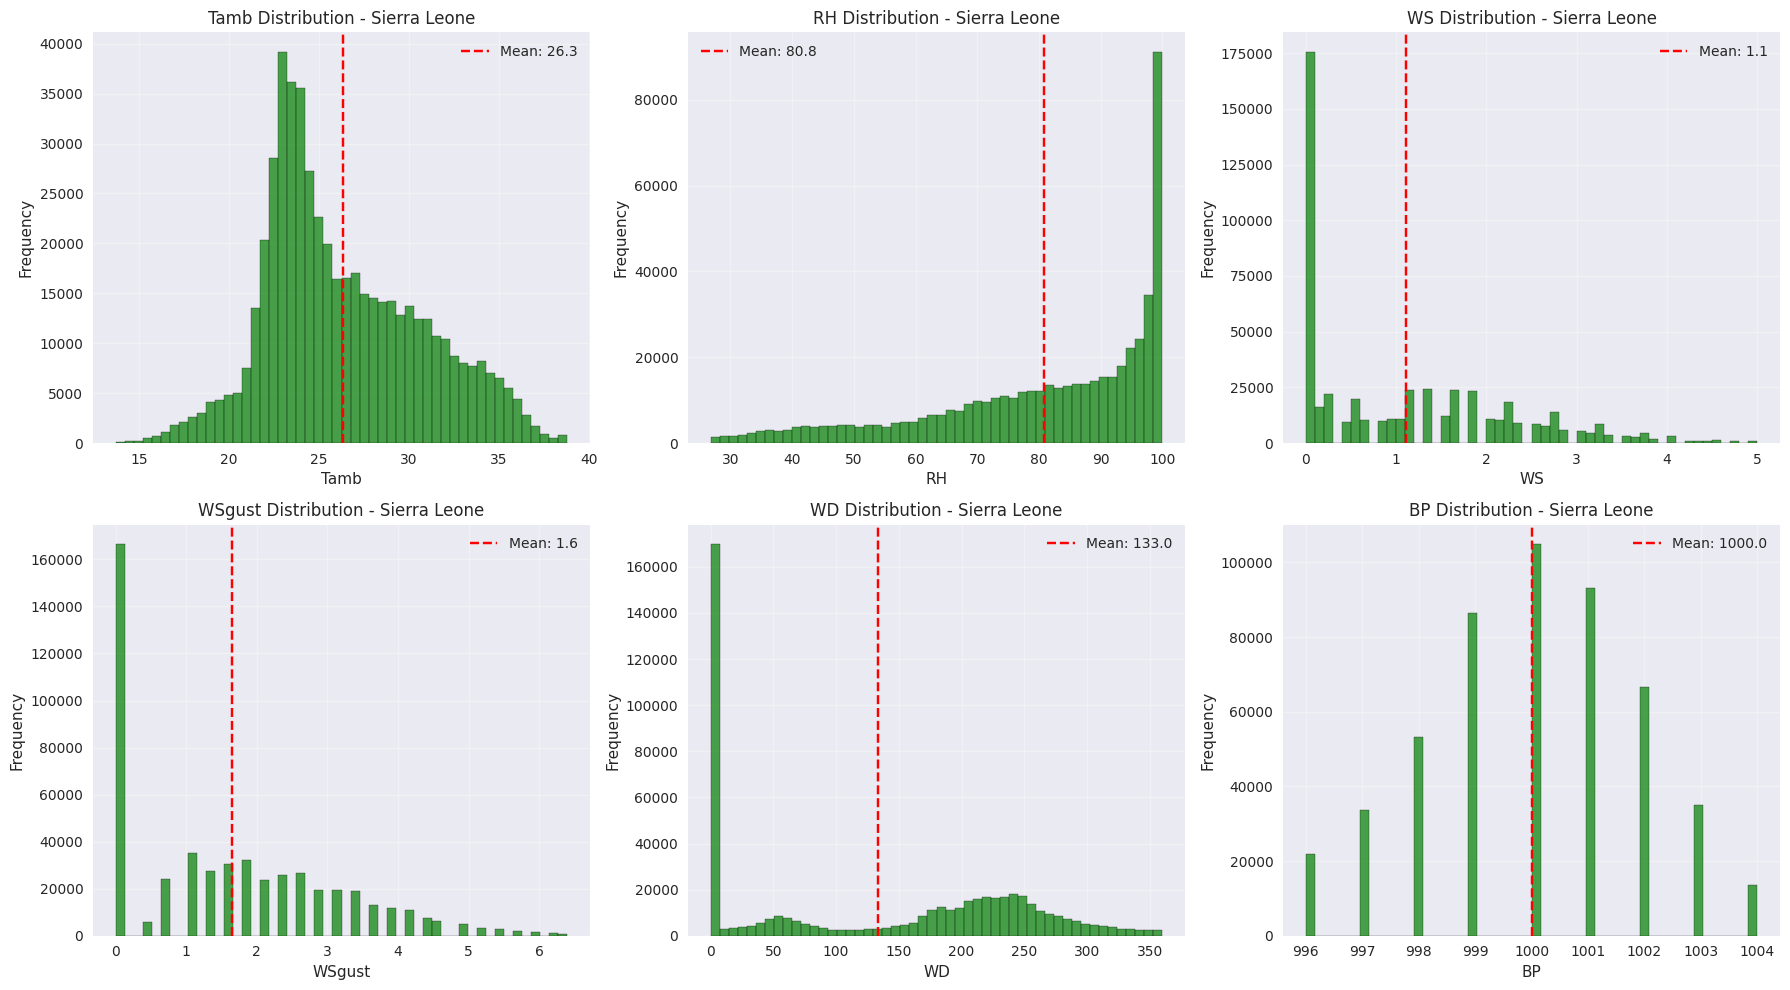

In [10]:
# Weather variables visualization
print("🌤️ WEATHER VARIABLES ANALYSIS - SIERRA LEONE")
print("=" * 50)

fig, axes = plt.subplots(2, 3, figsize=(18, 10))
axes = axes.ravel()

for i, col in enumerate(weather_columns):
    ax = axes[i]
    
    # Remove outliers for better visualization
    Q1 = df_sierraleone[col].quantile(0.25)
    Q3 = df_sierraleone[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    filtered_data = df_sierraleone[(df_sierraleone[col] >= lower_bound) & (df_sierraleone[col] <= upper_bound)][col]
    
    ax.hist(filtered_data.dropna(), bins=50, alpha=0.7, edgecolor='black', color='green')
    ax.set_title(f'{col} Distribution - Sierra Leone')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    ax.grid(True, alpha=0.3)
    
    # Add mean line
    mean_val = filtered_data.mean()
    ax.axvline(mean_val, color='red', linestyle='--', label=f'Mean: {mean_val:.1f}')
    ax.legend()

plt.tight_layout()
plt.show()

## 🕐 8. Time Series Analysis

📅 TIME SERIES ANALYSIS - SIERRA LEONE
📊 Analyzing sample week: 2021-10-30 to 2021-11-06


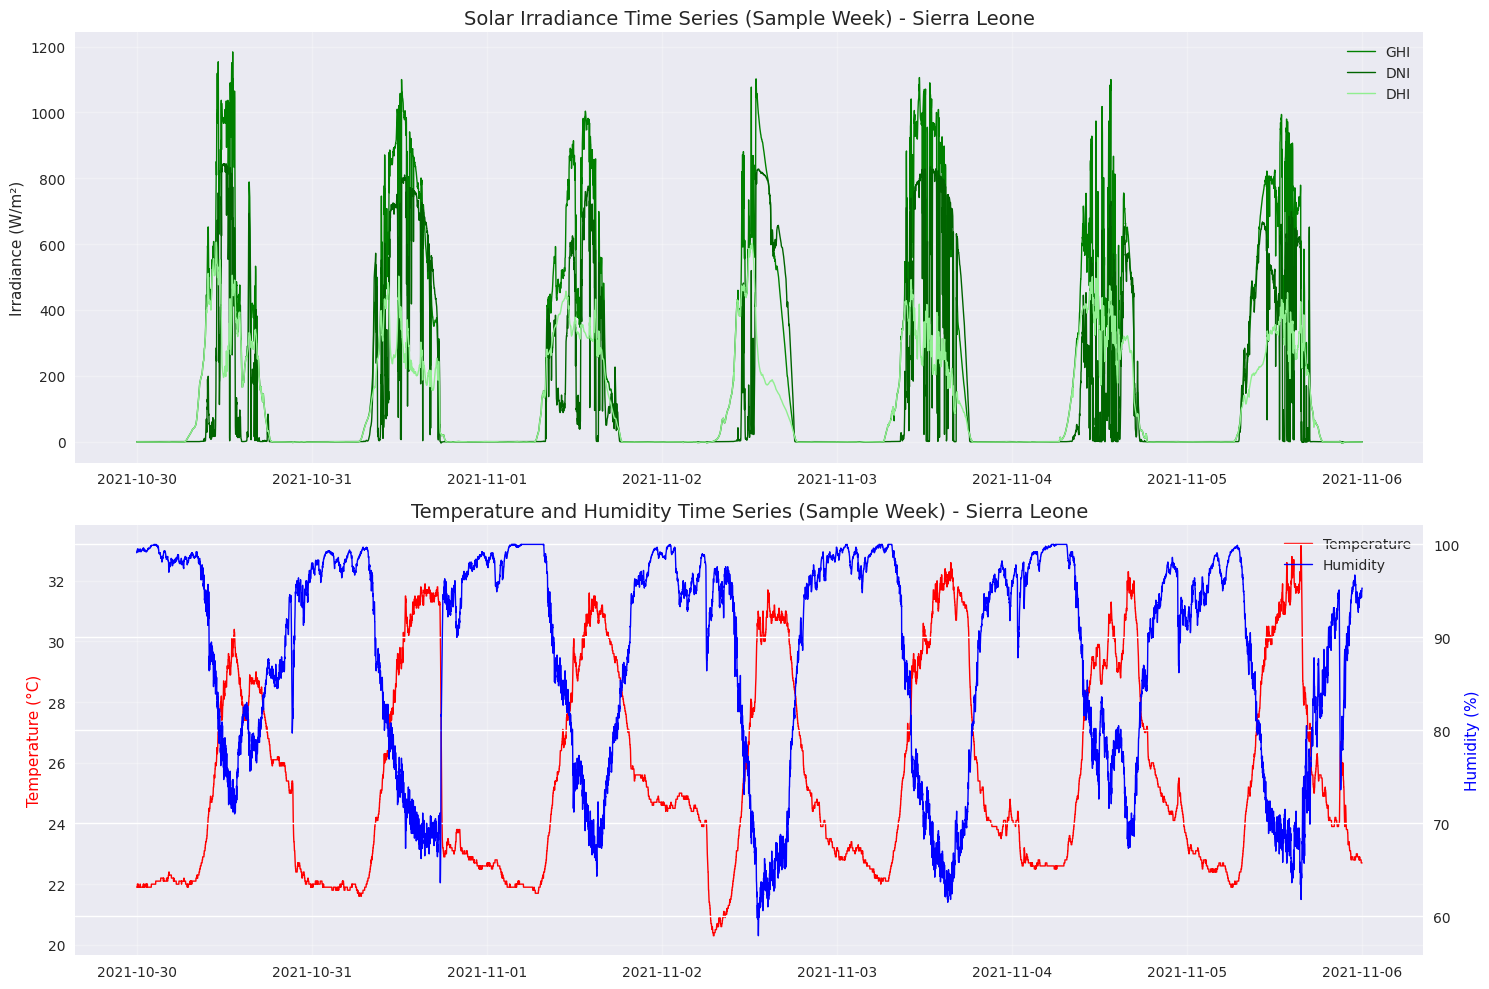

In [11]:
# Time series analysis - Daily patterns
print("📅 TIME SERIES ANALYSIS - SIERRA LEONE")
print("=" * 50)

# Get first week of data for analysis
start_date = df_sierraleone.index.min()
end_date = start_date + pd.Timedelta(days=7)
sample_week = df_sierraleone[start_date:end_date]

print(f"📊 Analyzing sample week: {start_date.strftime('%Y-%m-%d')} to {end_date.strftime('%Y-%m-%d')}")

fig, axes = plt.subplots(2, 1, figsize=(15, 10))

# Plot 1: Solar irradiance time series
colors = ['green', 'darkgreen', 'lightgreen']
for i, col in enumerate(solar_columns):
    axes[0].plot(sample_week.index, sample_week[col], label=col, linewidth=1, color=colors[i])

axes[0].set_title('Solar Irradiance Time Series (Sample Week) - Sierra Leone', fontsize=14)
axes[0].set_ylabel('Irradiance (W/m²)')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

# Plot 2: Temperature and humidity
ax2 = axes[1]
ax2_twin = ax2.twinx()

line1 = ax2.plot(sample_week.index, sample_week['Tamb'], 'r-', label='Temperature', linewidth=1)
line2 = ax2_twin.plot(sample_week.index, sample_week['RH'], 'b-', label='Humidity', linewidth=1)

ax2.set_ylabel('Temperature (°C)', color='r')
ax2_twin.set_ylabel('Humidity (%)', color='b')
ax2.set_title('Temperature and Humidity Time Series (Sample Week) - Sierra Leone', fontsize=14)

# Combine legends
lines = line1 + line2
labels = [l.get_label() for l in lines]
ax2.legend(lines, labels, loc='upper right')

ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 🔗 9. Correlation Analysis

🔗 CORRELATION ANALYSIS - SIERRA LEONE


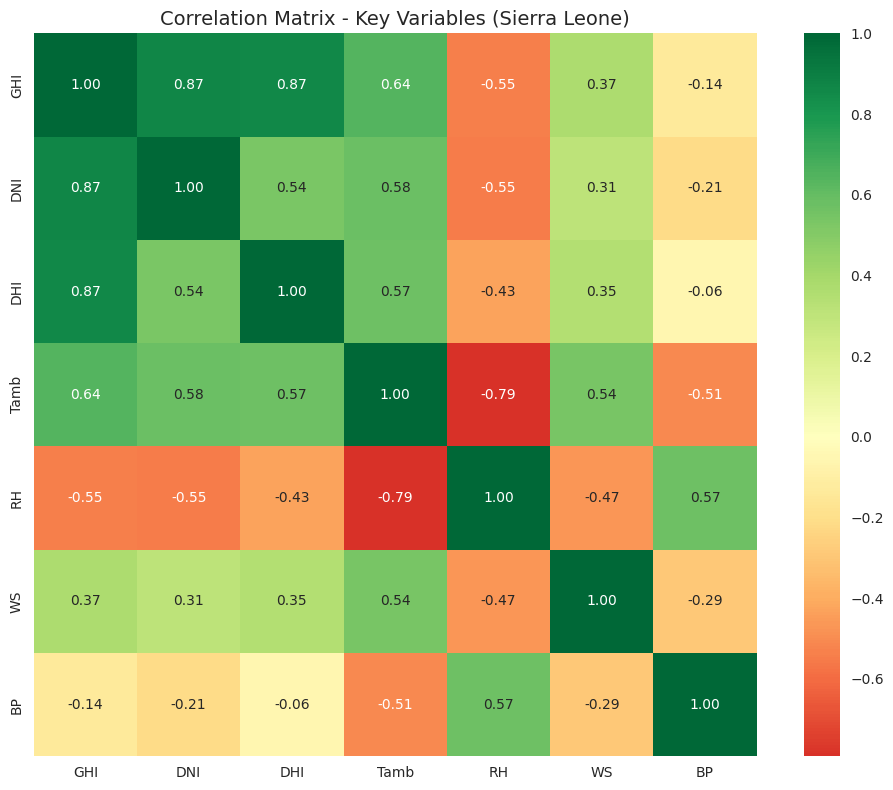


🔥 Strongest Positive Correlations:
GHI  DNI     0.869108
     DHI     0.865815
     Tamb    0.641261
DNI  Tamb    0.578346
RH   BP      0.571448
dtype: float64

❄️ Strongest Negative Correlations:
RH    WS   -0.471197
Tamb  BP   -0.511430
GHI   RH   -0.546677
DNI   RH   -0.548800
Tamb  RH   -0.791937
dtype: float64


In [12]:
# Correlation analysis
print("🔗 CORRELATION ANALYSIS - SIERRA LEONE")
print("=" * 50)

# Select key variables for correlation
correlation_vars = ['GHI', 'DNI', 'DHI', 'Tamb', 'RH', 'WS', 'BP']
correlation_matrix = df_sierraleone[correlation_vars].corr()

# Create heatmap with green color scheme for Sierra Leone
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, 
            annot=True, 
            cmap='RdYlGn', 
            center=0,
            square=True,
            fmt='.2f')
plt.title('Correlation Matrix - Key Variables (Sierra Leone)', fontsize=14)
plt.tight_layout()
plt.show()

# Print strongest correlations
print("\n🔥 Strongest Positive Correlations:")
# Get upper triangle of correlation matrix
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))
strong_corr = upper_triangle.stack().sort_values(ascending=False)
print(strong_corr.head(5))

print("\n❄️ Strongest Negative Correlations:")
print(strong_corr.tail(5))

## 🧹 10. Data Cleaning

In [13]:
# Data cleaning process
print("🧹 DATA CLEANING PROCESS - SIERRA LEONE")
print("=" * 50)

# Create a copy for cleaning
df_clean = df_sierraleone.copy()

print(f"📊 Original dataset shape: {df_clean.shape}")

# 1. Handle negative solar irradiance values (set to 0 for nighttime)
solar_cols = ['GHI', 'DNI', 'DHI']
for col in solar_cols:
    negative_count = (df_clean[col] < 0).sum()
    print(f"🌙 {col}: {negative_count:,} negative values (setting to 0)")
    df_clean[col] = df_clean[col].clip(lower=0)

# 2. Remove extreme outliers (Z-score > 4) for key variables
outlier_threshold = 4
key_vars = ['GHI', 'DNI', 'DHI', 'Tamb', 'RH', 'WS']

rows_before = len(df_clean)
for col in key_vars:
    z_scores = np.abs(zscore(df_clean[col], nan_policy='omit'))
    outlier_mask = z_scores > outlier_threshold
    outlier_count = outlier_mask.sum()
    
    if outlier_count > 0:
        print(f"🎯 {col}: Removing {outlier_count:,} extreme outliers")
        df_clean = df_clean[~outlier_mask]

rows_after = len(df_clean)
removed_rows = rows_before - rows_after

print(f"\n✂️ Removed {removed_rows:,} rows ({(removed_rows/rows_before)*100:.2f}%)")
print(f"📊 Cleaned dataset shape: {df_clean.shape}")

# 3. Handle missing values by forward fill (appropriate for time series)
missing_before = df_clean.isnull().sum().sum()
df_clean = df_clean.fillna(method='ffill').fillna(method='bfill')
missing_after = df_clean.isnull().sum().sum()

print(f"💧 Filled {missing_before - missing_after:,} missing values")
print(f"✅ Final missing values: {missing_after}")

🧹 DATA CLEANING PROCESS - SIERRA LEONE
📊 Original dataset shape: (525600, 18)
🌙 GHI: 261,135 negative values (setting to 0)
🌙 DNI: 266,352 negative values (setting to 0)
🌙 DHI: 263,128 negative values (setting to 0)
🎯 GHI: Removing 26 extreme outliers
🎯 DHI: Removing 64 extreme outliers
📊 Original dataset shape: (525600, 18)
🌙 GHI: 261,135 negative values (setting to 0)
🌙 DNI: 266,352 negative values (setting to 0)
🌙 DHI: 263,128 negative values (setting to 0)
🎯 GHI: Removing 26 extreme outliers
🎯 DHI: Removing 64 extreme outliers
🎯 WS: Removing 1,136 extreme outliers

✂️ Removed 1,226 rows (0.23%)
📊 Cleaned dataset shape: (524374, 18)
🎯 WS: Removing 1,136 extreme outliers

✂️ Removed 1,226 rows (0.23%)
📊 Cleaned dataset shape: (524374, 18)
💧 Filled 0 missing values
✅ Final missing values: 524374
💧 Filled 0 missing values
✅ Final missing values: 524374


## 📤 11. Export Cleaned Dataset

In [14]:
# Export cleaned dataset
print("💾 EXPORTING CLEANED DATASET - SIERRA LEONE")
print("=" * 50)

# Create output directory if it doesn't exist
import os
output_dir = '../data/'
os.makedirs(output_dir, exist_ok=True)

# Save cleaned dataset
output_file = os.path.join(output_dir, 'sierraleone_cleaned.csv')
df_clean.to_csv(output_file)

print(f"✅ Cleaned dataset saved to: {output_file}")
print(f"📊 Final dataset shape: {df_clean.shape}")
print(f"💾 File size: {os.path.getsize(output_file) / 1024**2:.2f} MB")

# Display summary statistics of cleaned data
print("\n📈 CLEANED DATA SUMMARY - SIERRA LEONE")
print("=" * 40)
print("\n☀️ Solar Irradiance (cleaned):")
print(df_clean[solar_columns].describe().round(2))

💾 EXPORTING CLEANED DATASET - SIERRA LEONE
✅ Cleaned dataset saved to: ../data/sierraleone_cleaned.csv
📊 Final dataset shape: (524374, 18)
💾 File size: 48.69 MB

📈 CLEANED DATA SUMMARY - SIERRA LEONE

☀️ Solar Irradiance (cleaned):
             GHI        DNI        DHI
count  524374.00  524374.00  524374.00
mean      204.50     116.61     116.31
std       296.67     218.62     156.91
min         0.00       0.00       0.00
25%         0.00       0.00       0.00
50%         0.30       0.00       0.00
75%       362.80     107.50     224.90
max      1390.00     946.00     743.80
✅ Cleaned dataset saved to: ../data/sierraleone_cleaned.csv
📊 Final dataset shape: (524374, 18)
💾 File size: 48.69 MB

📈 CLEANED DATA SUMMARY - SIERRA LEONE

☀️ Solar Irradiance (cleaned):
             GHI        DNI        DHI
count  524374.00  524374.00  524374.00
mean      204.50     116.61     116.31
std       296.67     218.62     156.91
min         0.00       0.00       0.00
25%         0.00       0.00      

## 📝 12. Key Insights Summary

In [15]:
# Generate key insights
print("📝 KEY INSIGHTS - SIERRA LEONE (BUMBUNA)")
print("=" * 50)

# Solar irradiance insights
ghi_max = df_clean['GHI'].max()
ghi_mean = df_clean[df_clean['GHI'] > 0]['GHI'].mean()
dni_max = df_clean['DNI'].max()
dni_mean = df_clean[df_clean['DNI'] > 0]['DNI'].mean()

print(f"☀️ SOLAR IRRADIANCE:")
print(f"   • Peak GHI: {ghi_max:.1f} W/m²")
print(f"   • Average GHI (daylight): {ghi_mean:.1f} W/m²")
print(f"   • Peak DNI: {dni_max:.1f} W/m²")
print(f"   • Average DNI (daylight): {dni_mean:.1f} W/m²")

# Weather insights
temp_range = f"{df_clean['Tamb'].min():.1f}°C to {df_clean['Tamb'].max():.1f}°C"
avg_temp = df_clean['Tamb'].mean()
avg_humidity = df_clean['RH'].mean()
avg_wind = df_clean['WS'].mean()

print(f"\n🌡️ WEATHER CONDITIONS:")
print(f"   • Temperature range: {temp_range}")
print(f"   • Average temperature: {avg_temp:.1f}°C")
print(f"   • Average humidity: {avg_humidity:.1f}%")
print(f"   • Average wind speed: {avg_wind:.1f} m/s")

# Data quality insights
data_completeness = (1 - df_sierraleone.isnull().sum().sum() / (df_sierraleone.shape[0] * df_sierraleone.shape[1])) * 100
outlier_percentage = (removed_rows / rows_before) * 100

print(f"\n📊 DATA QUALITY:")
print(f"   • Original completeness: {data_completeness:.2f}%")
print(f"   • Outliers removed: {outlier_percentage:.2f}%")
print(f"   • Final dataset: {df_clean.shape[0]:,} records")

# Comparison with Benin (if interested)
print(f"\n🔄 COMPARISON NOTES:")
print(f"   • Ready for cross-country comparison with Benin and Togo")
print(f"   • Similar analysis methodology ensures valid comparison")

print(f"\n✅ Sierra Leone EDA completed successfully!")

📝 KEY INSIGHTS - SIERRA LEONE (BUMBUNA)
☀️ SOLAR IRRADIANCE:
   • Peak GHI: 1390.0 W/m²
   • Average GHI (daylight): 407.5 W/m²
   • Peak DNI: 946.0 W/m²
   • Average DNI (daylight): 264.4 W/m²

🌡️ WEATHER CONDITIONS:
   • Temperature range: 12.3°C to 39.9°C
   • Average temperature: 26.3°C
   • Average humidity: 79.5%
   • Average wind speed: 1.1 m/s

📊 DATA QUALITY:
   • Original completeness: 94.44%
   • Outliers removed: 0.23%
   • Final dataset: 524,374 records

🔄 COMPARISON NOTES:
   • Ready for cross-country comparison with Benin and Togo
   • Similar analysis methodology ensures valid comparison

✅ Sierra Leone EDA completed successfully!
